In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import json
import baseline
from encoder import *
from baseline import *
from decoder import *
from alphabet import *
from train import *
import torch
from matplotlib import pyplot as plt

torch.__version__

'1.4.0'

In [2]:
LANGUAGE = 'Python'

def filter_ascii(strings):
    'Returns only the strings that can be encoded in ASCII.'
    l = []
    for s in strings:
        try:
            s.encode('ascii')
            if len(s) <= 80:
                l.append(s)
        except UnicodeEncodeError:
            pass
        
    return l

with open('dataset/medium.json') as f:
    multilang_dataset = json.load(f)
    dataset = multilang_dataset[LANGUAGE]
    
    dataset['train'] = filter_ascii(dataset['train'])
    dataset['dev'] = filter_ascii(dataset['dev'])
    dataset['test'] = filter_ascii(dataset['test'])
    
    tiny_dataset = {
        'train': dataset['train'][:50],
        'dev': dataset['train'][:50],
        'test': dataset['train'][:50],
    }
    
    print('{} training examples, {} validation examples, {} test exampless'.format(
        len(dataset['train']), 
        len(dataset['dev']),
        len(dataset['test'])))

76738 training examples, 9590 validation examples, 9616 test exampless


In [12]:
def generate_dumb_dataset():
    'Returns a dataset where all examples are the same string, which consists of 10 times the same letter.'

    SIZE = 200
    l = []

    for i in range(SIZE):
        l.append(random.choice('abcdefghijklmnopqrstuvwxyz') * random.choice([5, 10]))
        
    return {'train': l, 'dev': l, 'test': l}

dumb_dataset = generate_dumb_dataset()

In [13]:
device = torch.device(0) if torch.cuda.is_available() else torch.device('cpu')
print(device)

alphabet = AsciiOneHotEncoding(device)
encoder = baseline.UniformEncoder(0.9)
decoder = AutoCompleteDecoderModel(alphabet, hidden_size=64)
nencoder = NeuralEncoder(alphabet, epsilon=0.5, hidden_size=64)

cpu


In [14]:
decoder.beam_search("hello", alphabet, beam_size=2, max_depth=10)

[(-4.81735604984369,
  '\x01\x02',
  tensor([[ 0.0379,  0.0103,  0.0729, -0.0059, -0.0102,  0.0876, -0.0396,  0.0343,
            0.0184,  0.0060,  0.0270, -0.0606, -0.0315, -0.0503,  0.0025,  0.0263,
            0.0372, -0.0463,  0.0517, -0.0054, -0.0363, -0.0678,  0.0483, -0.0529,
           -0.0234, -0.0349,  0.0242, -0.0795,  0.0252,  0.0210, -0.0412,  0.0333,
            0.0028, -0.0584, -0.0897,  0.0544, -0.0127,  0.0207,  0.0022, -0.0644,
           -0.0258, -0.0074, -0.0080, -0.0492, -0.0103, -0.0111, -0.0155, -0.0705,
            0.0363, -0.0040, -0.0352,  0.0498,  0.0075,  0.0207, -0.0178, -0.0362,
            0.0475, -0.0749,  0.0150,  0.0410, -0.0380,  0.0149, -0.0382, -0.0475]],
         grad_fn=<MulBackward0>),
  tensor([[ 0.0681,  0.0205,  0.1415, -0.0117, -0.0202,  0.1558, -0.0769,  0.0759,
            0.0359,  0.0120,  0.0509, -0.1129, -0.0683, -0.1075,  0.0051,  0.0483,
            0.0724, -0.0912,  0.1005, -0.0107, -0.0700, -0.1327,  0.1008, -0.1153,
           -0.04

In [6]:
def expected_initial_loss(input_string, epsilon, alphabet, lam):
    s, a = len(input_string), alphabet.embedding_size()
    return s/2.0 + lam*(s*math.log(a)-epsilon)

print(expected_initial_loss('ddddd',0.5,alphabet,10))

240.10151319598083


Initial lambda: 30.0
Epoch 0 iteration 0: loss = 29.929, lambda: 30.010, % kept: 1.000, rec_loss: 4.852, enc_ll: -0.04, tp = 6.37 lines/s, ETA 00h01m34s
Epoch 0 iteration 2: loss = 399.622, lambda: 30.163, % kept: 0.800, rec_loss: 4.852, enc_ll: -0.54, tp = 13.66 lines/s, ETA 00h00m43s
Epoch 0 iteration 4: loss = 30.041, lambda: 30.195, % kept: 1.000, rec_loss: 4.849, enc_ll: -0.04, tp = 17.63 lines/s, ETA 00h00m33s
Epoch 0 iteration 6: loss = 30.004, lambda: 30.214, % kept: 1.000, rec_loss: 4.842, enc_ll: -0.04, tp = 21.05 lines/s, ETA 00h00m28s
Epoch 0 iteration 8: loss = 459.438, lambda: 30.375, % kept: 0.900, rec_loss: 4.776, enc_ll: -0.32, tp = 22.53 lines/s, ETA 00h00m26s
Epoch 0 iteration 10: loss = 431.654, lambda: 30.535, % kept: 0.900, rec_loss: 4.464, enc_ll: -0.32, tp = 22.80 lines/s, ETA 00h00m25s
Epoch 0 iteration 12: loss = 64.470, lambda: 30.707, % kept: 1.000, rec_loss: 4.753, enc_ll: -0.04, tp = 23.23 lines/s, ETA 00h00m25s
Epoch 0 iteration 14: loss = 671.659, lambda

Epoch 0 iteration 122: loss = 18.329, lambda: 36.781, % kept: 1.000, rec_loss: 2.466, enc_ll: -0.04, tp = 28.61 lines/s, ETA 00h00m16s
Epoch 0 iteration 124: loss = 38.941, lambda: 36.893, % kept: 1.000, rec_loss: 2.401, enc_ll: -0.04, tp = 28.60 lines/s, ETA 00h00m16s
Epoch 0 iteration 126: loss = 500.469, lambda: 37.169, % kept: 0.900, rec_loss: 4.255, enc_ll: -0.32, tp = 28.56 lines/s, ETA 00h00m16s
Epoch 0 iteration 128: loss = 41.266, lambda: 37.188, % kept: 1.000, rec_loss: 2.523, enc_ll: -0.04, tp = 28.61 lines/s, ETA 00h00m16s
Epoch 0 iteration 130: loss = 777.465, lambda: 37.402, % kept: 0.800, rec_loss: 3.544, enc_ll: -0.59, tp = 28.65 lines/s, ETA 00h00m16s
Epoch 0 iteration 132: loss = 21.414, lambda: 37.514, % kept: 1.000, rec_loss: 2.814, enc_ll: -0.04, tp = 28.68 lines/s, ETA 00h00m16s
Epoch 0 iteration 134: loss = 316.493, lambda: 37.717, % kept: 0.800, rec_loss: 3.098, enc_ll: -0.54, tp = 28.70 lines/s, ETA 00h00m16s
Epoch 0 iteration 136: loss = 31.316, lambda: 37.820

Epoch 1 iteration 47: loss = 437.982, lambda: 43.075, % kept: 0.900, rec_loss: 3.221, enc_ll: -0.32, tp = 29.46 lines/s, ETA 00h00m11s
Epoch 1 iteration 49: loss = 39.784, lambda: 43.166, % kept: 1.000, rec_loss: 4.498, enc_ll: -0.04, tp = 29.51 lines/s, ETA 00h00m11s
Epoch 1 iteration 51: loss = 55.314, lambda: 43.199, % kept: 1.000, rec_loss: 2.904, enc_ll: -0.04, tp = 29.51 lines/s, ETA 00h00m11s
Epoch 1 iteration 53: loss = 28.582, lambda: 43.279, % kept: 1.000, rec_loss: 3.245, enc_ll: -0.04, tp = 29.54 lines/s, ETA 00h00m11s
Epoch 1 iteration 55: loss = 272.649, lambda: 43.421, % kept: 0.900, rec_loss: 1.999, enc_ll: -0.32, tp = 29.50 lines/s, ETA 00h00m11s
Epoch 1 iteration 57: loss = 40.475, lambda: 43.440, % kept: 1.000, rec_loss: 4.548, enc_ll: -0.04, tp = 29.53 lines/s, ETA 00h00m11s
Epoch 1 iteration 59: loss = 42.506, lambda: 43.458, % kept: 1.000, rec_loss: 4.769, enc_ll: -0.04, tp = 29.48 lines/s, ETA 00h00m11s
Epoch 1 iteration 61: loss = 58.304, lambda: 43.479, % kept:

Epoch 1 iteration 173: loss = 57.223, lambda: 48.591, % kept: 1.000, rec_loss: 2.671, enc_ll: -0.04, tp = 29.46 lines/s, ETA 00h00m07s
Epoch 1 iteration 175: loss = 87.601, lambda: 48.738, % kept: 1.000, rec_loss: 4.061, enc_ll: -0.04, tp = 29.43 lines/s, ETA 00h00m07s
Epoch 1 iteration 177: loss = 425.125, lambda: 48.925, % kept: 0.900, rec_loss: 2.760, enc_ll: -0.32, tp = 29.40 lines/s, ETA 00h00m07s
Epoch 1 iteration 179: loss = 26.469, lambda: 48.938, % kept: 1.000, rec_loss: 2.665, enc_ll: -0.04, tp = 29.44 lines/s, ETA 00h00m07s
Epoch 1 iteration 181: loss = 73.515, lambda: 49.054, % kept: 1.000, rec_loss: 3.388, enc_ll: -0.04, tp = 29.43 lines/s, ETA 00h00m07s
Epoch 1 iteration 183: loss = 457.195, lambda: 49.151, % kept: 0.800, rec_loss: 3.435, enc_ll: -0.54, tp = 29.46 lines/s, ETA 00h00m07s
Epoch 1 iteration 185: loss = 326.578, lambda: 49.223, % kept: 0.800, rec_loss: 2.472, enc_ll: -0.54, tp = 29.50 lines/s, ETA 00h00m07s
Epoch 1 iteration 187: loss = 79.953, lambda: 49.251

Epoch 2 iteration 96: loss = 525.296, lambda: 52.799, % kept: 0.900, rec_loss: 3.151, enc_ll: -0.32, tp = 29.50 lines/s, ETA 00h00m03s
Epoch 2 iteration 98: loss = 80.287, lambda: 52.820, % kept: 1.000, rec_loss: 3.473, enc_ll: -0.04, tp = 29.49 lines/s, ETA 00h00m03s
Epoch 2 iteration 100: loss = 190.872, lambda: 52.894, % kept: 0.800, rec_loss: 1.378, enc_ll: -0.54, tp = 29.51 lines/s, ETA 00h00m03s
Epoch 2 iteration 102: loss = 50.256, lambda: 52.910, % kept: 1.000, rec_loss: 2.187, enc_ll: -0.04, tp = 29.50 lines/s, ETA 00h00m03s
Epoch 2 iteration 104: loss = 72.039, lambda: 52.931, % kept: 1.000, rec_loss: 3.119, enc_ll: -0.04, tp = 29.51 lines/s, ETA 00h00m03s
Epoch 2 iteration 106: loss = 38.413, lambda: 53.037, % kept: 1.000, rec_loss: 3.597, enc_ll: -0.04, tp = 29.51 lines/s, ETA 00h00m03s
Epoch 2 iteration 108: loss = 24.639, lambda: 53.135, % kept: 1.000, rec_loss: 2.317, enc_ll: -0.04, tp = 29.52 lines/s, ETA 00h00m03s
Epoch 2 iteration 110: loss = 565.962, lambda: 53.366, 

TypeError: float() argument must be a string or a number, not 'dict'

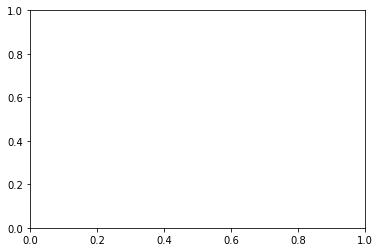

In [15]:
parameters = {
    'learning_rate': 5e-3,
    'verbose': True,
    'batch_size': 1,
    'init_scale': 0.01,
    'epochs': 3,
    'log_every':2
}

train_loss_history = train(nencoder, decoder, dumb_dataset, parameters, alphabet, device)
plt.plot(train_loss_history)

In [17]:
encoder = UniformEncoder(removal_probability=.8)
train_loss_history = train(encoder, decoder, dumb_dataset, parameters, alphabet, device)


Epoch 0 iteration 0: loss = 4.852, tp = 47.03 lines/s, ETA 00h00m12s
Epoch 0 iteration 2: loss = 4.851, tp = 42.10 lines/s, ETA 00h00m14s
Epoch 0 iteration 4: loss = 4.847, tp = 41.10 lines/s, ETA 00h00m14s
Epoch 0 iteration 6: loss = 4.806, tp = 43.31 lines/s, ETA 00h00m13s
Epoch 0 iteration 8: loss = 4.763, tp = 41.37 lines/s, ETA 00h00m14s
Epoch 0 iteration 10: loss = 4.825, tp = 41.24 lines/s, ETA 00h00m14s
Epoch 0 iteration 12: loss = 4.828, tp = 39.99 lines/s, ETA 00h00m14s
Epoch 0 iteration 14: loss = 3.933, tp = 40.02 lines/s, ETA 00h00m14s
Epoch 0 iteration 16: loss = 4.460, tp = 39.95 lines/s, ETA 00h00m14s
Epoch 0 iteration 18: loss = 3.797, tp = 38.74 lines/s, ETA 00h00m14s
Epoch 0 iteration 20: loss = 4.012, tp = 38.95 lines/s, ETA 00h00m14s
Epoch 0 iteration 22: loss = 2.452, tp = 39.19 lines/s, ETA 00h00m14s
Epoch 0 iteration 24: loss = 5.817, tp = 39.36 lines/s, ETA 00h00m14s
Epoch 0 iteration 26: loss = 5.833, tp = 38.99 lines/s, ETA 00h00m14s
Epoch 0 iteration 28: los

Epoch 1 iteration 39: loss = 2.781, tp = 39.23 lines/s, ETA 00h00m09s
Epoch 1 iteration 41: loss = 1.966, tp = 39.23 lines/s, ETA 00h00m09s
Epoch 1 iteration 43: loss = 1.521, tp = 39.19 lines/s, ETA 00h00m09s
Epoch 1 iteration 45: loss = 2.123, tp = 39.16 lines/s, ETA 00h00m09s
Epoch 1 iteration 47: loss = 3.590, tp = 39.15 lines/s, ETA 00h00m08s
Epoch 1 iteration 49: loss = 2.953, tp = 39.17 lines/s, ETA 00h00m08s
Epoch 1 iteration 51: loss = 1.237, tp = 39.22 lines/s, ETA 00h00m08s
Epoch 1 iteration 53: loss = 4.973, tp = 39.23 lines/s, ETA 00h00m08s
Epoch 1 iteration 55: loss = 2.356, tp = 39.18 lines/s, ETA 00h00m08s
Epoch 1 iteration 57: loss = 2.112, tp = 39.17 lines/s, ETA 00h00m08s
Epoch 1 iteration 59: loss = 3.329, tp = 39.12 lines/s, ETA 00h00m08s
Epoch 1 iteration 61: loss = 2.304, tp = 39.18 lines/s, ETA 00h00m08s
Epoch 1 iteration 63: loss = 1.706, tp = 39.19 lines/s, ETA 00h00m08s
Epoch 1 iteration 65: loss = 2.460, tp = 39.17 lines/s, ETA 00h00m08s
Epoch 1 iteration 67

Epoch 2 iteration 76: loss = 0.929, tp = 39.16 lines/s, ETA 00h00m03s
Epoch 2 iteration 78: loss = 2.466, tp = 39.13 lines/s, ETA 00h00m03s
Epoch 2 iteration 80: loss = 2.629, tp = 39.10 lines/s, ETA 00h00m02s
Epoch 2 iteration 82: loss = 0.959, tp = 39.07 lines/s, ETA 00h00m02s
Epoch 2 iteration 84: loss = 0.852, tp = 39.09 lines/s, ETA 00h00m02s
Epoch 2 iteration 86: loss = 0.992, tp = 39.09 lines/s, ETA 00h00m02s
Epoch 2 iteration 88: loss = 0.858, tp = 39.13 lines/s, ETA 00h00m02s
Epoch 2 iteration 90: loss = 2.245, tp = 39.11 lines/s, ETA 00h00m02s
Epoch 2 iteration 92: loss = 2.008, tp = 39.13 lines/s, ETA 00h00m02s
Epoch 2 iteration 94: loss = 3.633, tp = 39.10 lines/s, ETA 00h00m02s
Epoch 2 iteration 96: loss = 1.380, tp = 39.15 lines/s, ETA 00h00m02s
Epoch 2 iteration 98: loss = 0.903, tp = 39.14 lines/s, ETA 00h00m02s
Epoch 2 iteration 100: loss = 2.375, tp = 39.14 lines/s, ETA 00h00m02s
Epoch 2 iteration 102: loss = 2.671, tp = 39.15 lines/s, ETA 00h00m02s
Epoch 2 iteration 

In [25]:
list(map(lambda x:x[1], decoder.beam_search("hello", alphabet, beam_size=5, max_depth=10)))

['\x01eee\x02', '\x01eke\x02', '\x01ek\x02', '\x01ee\x02', '\x01ke\x02']

In [9]:
ps = torch.tensor([0.3, 0.8], requires_grad=True)
bs = torch.bernoulli(ps)
s = bs.sum()
print(s)
s.backward()
print(bs)
print(bs.grad)

from torch.distributions import Categorical

b = Categorical(ps)
mask = b.sample()
# next_state, reward = env.step(action)
# loss = -m.log_prob(action) * reward
loss = b.log_prob(mask)
loss.backward()
print(loss)
print(mask.grad)

tensor(0., grad_fn=<SumBackward0>)
tensor([0., 0.], grad_fn=<BernoulliBackward0>)
None
tensor(-0.3185, grad_fn=<SqueezeBackward1>)
None


In [109]:
bs._grad

# End-to-end samples

In [28]:
SPLIT = 'train'

import copy

s = random.choice(dumb_dataset[SPLIT])
compressed = encoder.encode(s)
decompressed = decoder([compressed],alphabet)

print('String:', repr(s))
print('Encoded:', repr(compressed))
print('Decoded:', repr(decompressed[0]))
print(len(decompressed))

String: 'ooooo'
Encoded: 'ooo'
Decoded: 'eee'
1


In [46]:
def average(x): return sum(x)/len(x)

def edit_distance(s1,s2):
    if len(s1)==0: return len(s2)
    if len(s2)==0: return len(s1)
    if s1[0] == s2[0]: return edit_distance(s1[1:], s2[1:])
    return 1 + min(edit_distance(s1[1:],s2),
                   edit_distance(s1,s2[1:]),
                   edit_distance(s1[1:],s2[1:]))
print(edit_distance('goose','geese'))
print(edit_distance('geek','gesek'))
print(edit_distance('cat','cut'))
print(edit_distance('saturday','sunday'))

2
1
1
3


In [ ]:
def top1accuracy(dataset):
    return len(list(filter(lambda s: s == decoder([encoder.encode(s)],alphabet)[0],
                         dataset)))/len(dataset)

def top5accuracy(dataset):
    count = 0
    for string in dataset:
        compressed = encoder.encode(string)
        best_five = list(map(lambda x:x[1][1:-1], 
                             decoder.beam_search(compressed, alphabet, beam_size=5, max_depth=20)))
        if string in best_five: count += 1
    return float(count) / len(dataset)

def editAccuracy(dataset):
    return average([
        edit_distance(decoder(encoder.encode(s), alphabet), 
                      s)/len(s) for s in dataset])

print(top1accuracy(dumb_dataset[SPLIT]))
print(top5accuracy(dumb_dataset[SPLIT]))
print(editAccuracy(dumb_dataset[SPLIT]))


0.055
0.185
